In [30]:
import pandas as pd


# Charger le deuxième fichier CSV
df = pd.read_csv('/kaggle/input/dataset-1-csv/dataset (1).csv')
df

,Unnamed: 0,File Name,Duration,Sampling Rate,Audio Data,pitch,case,gender,Numerical Prefix,vowel
0,0,4-a_high.wav,1.67112,50000,[-0.1324768 -0.13296509 -0.13232422 ... -0.13...,high,normal,man,4,a
1,1,4-a_low.wav,1.56196,50000,[0.05105591 0.05200195 0.05157471 ... 0.059417...,low,normal,man,4,a
2,2,4-a_normal.wav,1.74760,50000,[-0.03515625 -0.02908325 -0.02423096 ... 0.02...,normal,normal,man,4,a
3,3,4-i_high.wav,1.92658,50000,[ 0.01287842 0.01358032 0.01473999 ... -0.00...,high,normal,man,4,i
4,4,4-i_low.wav,1.89678,50000,[-0.0078125 -0.00897217 -0.01010132 ... -0.07...,low,normal,man,4,i
...,...,...,...,...,...,...,...,...,...,...
1129,1129,2596-i_low.wav,0.76336,50000,[-0.02481079 -0.01400757 -0.00198364 ... -0.10...,low,dysphonia,women,2596,i
1130,1130,2596-i_normal.wav,0.92208,50000,[0.10714722 0.11367798 0.11938477 ... 0.100555...,normal,dysphonia,women,2596,i
1131,1131,2596-u_high.wav,0.67750,50000,[-0.08956909 -0.10049438 -0.10910034 ... 0.11...,high,dysphonia,women,2596,u
1132,1132,2596-u_low.wav,0.68384,50000,[-0.05859375 -0.05877686 -0.05780029 ... -0.01...,low,dysphonia,women,2596,u


In [ ]:
import librosa
import numpy as np
import soundfile as sf
import os
from IPython.display import FileLink

# Function to normalize audio
def normalize_audio(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Normalize audio signal
    normalized_audio = librosa.util.normalize(y)

    return normalized_audio, sr

# Function to handle file normalization and saving
def normalize_and_save_files(input_audio_directory, output_audio_directory):
    normalized_files = []  # Store paths of normalized files

    # List audio files in the input directory
    audio_files = [input_audio_directory + file for file in os.listdir(input_audio_directory)]

    # Process audio files
    for file_path in audio_files:
        try:
            print("Processing:", file_path)
            # Normalize each audio file
            normalized_audio, sr = normalize_audio(file_path)

            # Example: Compute the maximum absolute amplitude before and after normalization
            max_amplitude_before = np.max(np.abs(librosa.load(file_path, sr=None)[0]))
            max_amplitude_after = np.max(np.abs(normalized_audio))

            print("Max absolute amplitude before normalization:", max_amplitude_before)
            print("Max absolute amplitude after normalization:", max_amplitude_after)

            # Save the normalized audio to the output directory
            normalized_audio_filename = "normalized_" + os.path.basename(file_path)
            output_file_path = os.path.join(output_audio_directory, normalized_audio_filename)
            sf.write(output_file_path, normalized_audio, sr)

            print("Normalized audio saved as:", normalized_audio_filename)
            normalized_files.append(output_file_path)  # Store the path of normalized file
        except Exception as e:
            print("Error processing file:", file_path)
            print("Error:", e)

    return normalized_files

# Define the input and output directories
input_audio_directory = '/kaggle/input/sample-data/'
output_audio_directory = '/kaggle/working/normalized_normal_man/'

# Create the output directory if it doesn't exist
os.makedirs(output_audio_directory, exist_ok=True)

# Call the function to normalize and save audio files
normalized_files = normalize_and_save_files(input_audio_directory, output_audio_directory)

# Provide links for downloading normalized files
for file_path in normalized_files:
    display(FileLink(file_path))


Processing: /kaggle/input/sample-data/43-a_l.wav
Max absolute amplitude before normalization: 0.43881226
Max absolute amplitude after normalization: 1.0
Normalized audio saved as: normalized_43-a_l.wav
Processing: /kaggle/input/sample-data/98-u_l.wav
Max absolute amplitude before normalization: 0.22790527
Max absolute amplitude after normalization: 1.0
Normalized audio saved as: normalized_98-u_l.wav
Processing: /kaggle/input/sample-data/43-i_n.wav
Max absolute amplitude before normalization: 0.6939087
Max absolute amplitude after normalization: 1.0
Normalized audio saved as: normalized_43-i_n.wav
Processing: /kaggle/input/sample-data/59-u_h.wav
Max absolute amplitude before normalization: 0.54782104
Max absolute amplitude after normalization: 1.0
Normalized audio saved as: normalized_59-u_h.wav
Processing: /kaggle/input/sample-data/66-i_l.wav
Max absolute amplitude before normalization: 0.5722656
Max absolute amplitude after normalization: 1.0
Normalized audio saved as: normalized_66-

/kaggle/working/normalized_normal_man/normalized_43-a_l.wav

/kaggle/working/normalized_normal_man/normalized_98-u_l.wav

/kaggle/working/normalized_normal_man/normalized_43-i_n.wav

/kaggle/working/normalized_normal_man/normalized_59-u_h.wav

/kaggle/working/normalized_normal_man/normalized_66-i_l.wav

/kaggle/working/normalized_normal_man/normalized_53-a_l.wav

/kaggle/working/normalized_normal_man/normalized_29-phrase.wav

/kaggle/working/normalized_normal_man/normalized_53-u_l.wav

/kaggle/working/normalized_normal_man/normalized_98-i_l.wav

/kaggle/working/normalized_normal_man/normalized_61-phrase.wav

/kaggle/working/normalized_normal_man/normalized_68-phrase.wav

/kaggle/working/normalized_normal_man/normalized_66-a_l.wav

/kaggle/working/normalized_normal_man/normalized_85-a_n.wav

/kaggle/working/normalized_normal_man/normalized_61-i_n.wav

/kaggle/working/normalized_normal_man/normalized_100-phrase.wav

/kaggle/working/normalized_normal_man/normalized_63-phrase.wav

/kaggle/working/normalized_normal_man/normalized_81-u_h.wav

/kaggle/working/normalized_normal_man/normalized_60-i_n.wav

/kaggle/working/normalized_normal_man/normalized_92-i_n.wav

/kaggle/working/normalized_normal_man/normalized_15-a_n.wav

/kaggle/working/normalized_normal_man/normalized_132-i_n.wav

/kaggle/working/normalized_normal_man/normalized_40-phrase.wav

/kaggle/working/normalized_normal_man/normalized_40-u_l.wav

/kaggle/working/normalized_normal_man/normalized_63-u_n.wav

/kaggle/working/normalized_normal_man/normalized_85-phrase.wav

/kaggle/working/normalized_normal_man/normalized_41-u_h.wav

/kaggle/working/normalized_normal_man/normalized_59-i_n.wav

/kaggle/working/normalized_normal_man/normalized_84-i_n.wav

/kaggle/working/normalized_normal_man/normalized_5-i_h.wav

/kaggle/working/normalized_normal_man/normalized_32-phrase.wav

/kaggle/working/normalized_normal_man/normalized_87-a_l.wav

/kaggle/working/normalized_normal_man/normalized_156-u_h.wav

/kaggle/working/normalized_normal_man/normalized_15-u_h.wav

/kaggle/working/normalized_normal_man/normalized_4-phrase.wav

/kaggle/working/normalized_normal_man/normalized_40-a_h.wav

/kaggle/working/normalized_normal_man/normalized_132-i_l.wav

/kaggle/working/normalized_normal_man/normalized_103-a_n.wav

/kaggle/working/normalized_normal_man/normalized_59-a_n.wav

/kaggle/working/normalized_normal_man/normalized_156-a_n.wav

/kaggle/working/normalized_normal_man/normalized_103-i_h.wav

/kaggle/working/normalized_normal_man/normalized_43-a_h.wav

/kaggle/working/normalized_normal_man/normalized_32-a_l.wav

/kaggle/working/normalized_normal_man/normalized_60-a_h.wav

/kaggle/working/normalized_normal_man/normalized_84-a_l.wav

/kaggle/working/normalized_normal_man/normalized_41-i_h.wav

/kaggle/working/normalized_normal_man/normalized_4-u_h.wav

/kaggle/working/normalized_normal_man/normalized_98-i_n.wav

/kaggle/working/normalized_normal_man/normalized_132-u_h.wav

/kaggle/working/normalized_normal_man/normalized_98-i_h.wav

/kaggle/working/normalized_normal_man/normalized_41-a_n.wav

/kaggle/working/normalized_normal_man/normalized_84-i_h.wav

/kaggle/working/normalized_normal_man/normalized_134-i_n.wav

/kaggle/working/normalized_normal_man/normalized_84-a_h.wav

/kaggle/working/normalized_normal_man/normalized_40-u_n.wav

/kaggle/working/normalized_normal_man/normalized_85-u_n.wav

/kaggle/working/normalized_normal_man/normalized_68-i_h.wav

/kaggle/working/normalized_normal_man/normalized_40-i_n.wav

/kaggle/working/normalized_normal_man/normalized_67-u_l.wav

/kaggle/working/normalized_normal_man/normalized_92-i_l.wav

/kaggle/working/normalized_normal_man/normalized_84-u_n.wav

/kaggle/working/normalized_normal_man/normalized_100-a_l.wav

/kaggle/working/normalized_normal_man/normalized_66-i_h.wav

/kaggle/working/normalized_normal_man/normalized_74-a_h.wav

/kaggle/working/normalized_normal_man/normalized_63-a_l.wav

/kaggle/working/normalized_normal_man/normalized_74-i_h.wav

/kaggle/working/normalized_normal_man/normalized_134-i_h.wav

/kaggle/working/normalized_normal_man/normalized_98-a_h.wav

/kaggle/working/normalized_normal_man/normalized_98-phrase.wav

/kaggle/working/normalized_normal_man/normalized_61-u_l.wav

/kaggle/working/normalized_normal_man/normalized_100-i_n.wav

/kaggle/working/normalized_normal_man/normalized_32-u_h.wav

/kaggle/working/normalized_normal_man/normalized_87-phrase.wav

/kaggle/working/normalized_normal_man/normalized_53-a_h.wav

/kaggle/working/normalized_normal_man/normalized_43-u_h.wav

/kaggle/working/normalized_normal_man/normalized_29-i_n.wav

/kaggle/working/normalized_normal_man/normalized_134-i_l.wav

/kaggle/working/normalized_normal_man/normalized_98-a_l.wav

/kaggle/working/normalized_normal_man/normalized_43-i_l.wav

/kaggle/working/normalized_normal_man/normalized_29-a_h.wav

/kaggle/working/normalized_normal_man/normalized_4-i_n.wav

/kaggle/working/normalized_normal_man/normalized_87-a_n.wav

/kaggle/working/normalized_normal_man/normalized_100-a_n.wav

/kaggle/working/normalized_normal_man/normalized_60-i_l.wav

/kaggle/working/normalized_normal_man/normalized_61-a_l.wav

/kaggle/working/normalized_normal_man/normalized_92-a_l.wav

/kaggle/working/normalized_normal_man/normalized_4-i_l.wav

/kaggle/working/normalized_normal_man/normalized_61-i_h.wav

/kaggle/working/normalized_normal_man/normalized_59-a_l.wav

/kaggle/working/normalized_normal_man/normalized_132-phrase.wav

/kaggle/working/normalized_normal_man/normalized_134-u_h.wav

/kaggle/working/normalized_normal_man/normalized_59-phrase.wav

/kaggle/working/normalized_normal_man/normalized_15-a_l.wav

/kaggle/working/normalized_normal_man/normalized_96-u_l.wav

/kaggle/working/normalized_normal_man/normalized_43-u_l.wav

/kaggle/working/normalized_normal_man/normalized_84-u_h.wav

/kaggle/working/normalized_normal_man/normalized_134-a_h.wav

/kaggle/working/normalized_normal_man/normalized_9-a_h.wav

/kaggle/working/normalized_normal_man/normalized_15-u_l.wav

/kaggle/working/normalized_normal_man/normalized_134-a_h.wav

/kaggle/working/normalized_normal_man/normalized_9-a_h.wav

/kaggle/working/normalized_normal_man/normalized_15-u_l.wav

/kaggle/working/normalized_normal_man/normalized_100-i_l.wav

/kaggle/working/normalized_normal_man/normalized_15-phrase.wav

/kaggle/working/normalized_normal_man/normalized_67-i_l.wav

/kaggle/working/normalized_normal_man/normalized_156-i_h.wav

/kaggle/working/normalized_normal_man/normalized_103-a_l.wav

/kaggle/working/normalized_normal_man/normalized_53-a_n.wav

/kaggle/working/normalized_normal_man/normalized_11-i_h.wav

/kaggle/working/normalized_normal_man/normalized_81-a_n.wav

/kaggle/working/normalized_normal_man/normalized_96-i_l.wav

/kaggle/working/normalized_normal_man/normalized_43-u_n.wav

/kaggle/working/normalized_normal_man/normalized_15-u_n.wav

/kaggle/working/normalized_normal_man/normalized_84-i_l.wav

/kaggle/working/normalized_normal_man/normalized_11-a_n.wav

/kaggle/working/normalized_normal_man/normalized_134-u_l.wav

/kaggle/working/normalized_normal_man/normalized_81-i_n.wav

/kaggle/working/normalized_normal_man/normalized_61-i_l.wav

/kaggle/working/normalized_normal_man/normalized_134-phrase.wav

/kaggle/working/normalized_normal_man/normalized_41-i_l.wav

/kaggle/working/normalized_normal_man/normalized_29-i_h.wav

/kaggle/working/normalized_normal_man/normalized_84-u_l.wav

/kaggle/working/normalized_normal_man/normalized_85-i_h.wav

/kaggle/working/normalized_normal_man/normalized_63-a_h.wav

/kaggle/working/normalized_normal_man/normalized_100-a_h.wav

/kaggle/working/normalized_normal_man/normalized_66-a_n.wav

/kaggle/working/normalized_normal_man/normalized_32-a_h.wav

/kaggle/working/normalized_normal_man/normalized_5-a_h.wav

In [16]:
import librosa
import numpy as np
import soundfile as sf
import os
from IPython.display import FileLink

# Function to normalize audio
def normalize_audio(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Normalize audio signal
    normalized_audio = librosa.util.normalize(y)

    return normalized_audio, sr

# Function to handle file normalization and saving
def normalize_and_save_files(input_audio_directory, output_audio_directory):
    normalized_files = []  # Store paths of normalized files

    # List audio files in the input directory
    audio_files = [input_audio_directory + file for file in os.listdir(input_audio_directory)]

    # Process audio files
    for file_path in audio_files:
        try:
            print("Processing:", file_path)
            # Normalize each audio file
            normalized_audio, sr = normalize_audio(file_path)

            # Example: Compute the maximum absolute amplitude before and after normalization
            max_amplitude_before = np.max(np.abs(librosa.load(file_path, sr=None)[0]))
            max_amplitude_after = np.max(np.abs(normalized_audio))

            print("Max absolute amplitude before normalization:", max_amplitude_before)
            print("Max absolute amplitude after normalization:", max_amplitude_after)

            # Save the normalized audio to the output directory
            normalized_audio_filename = "normalized_" + os.path.basename(file_path)
            output_file_path = os.path.join(output_audio_directory, normalized_audio_filename)
            sf.write(output_file_path, normalized_audio, sr)

            print("Normalized audio saved as:", normalized_audio_filename)
            normalized_files.append(output_file_path)  # Store the path of normalized file
        except Exception as e:
            print("Error processing file:", file_path)
            print("Error:", e)

    return normalized_files

# Define the input and output directories
input_audio_directory = '/kaggle/input/sample1-data/'
output_audio_directory = '/kaggle/working/normalized_normal_women/'

# Create the output directory if it doesn't exist
os.makedirs(output_audio_directory, exist_ok=True)

# Call the function to normalize and save audio files
normalized_files = normalize_and_save_files(input_audio_directory, output_audio_directory)

# Provide links for downloading normalized files
for file_path in normalized_files:
    display(FileLink(file_path))


Processing: /kaggle/input/sample1-data/36-u_l.wav
Max absolute amplitude before normalization: 0.39733887
Max absolute amplitude after normalization: 1.0
Normalized audio saved as: normalized_36-u_l.wav
Processing: /kaggle/input/sample1-data/36-u_n.wav
Max absolute amplitude before normalization: 0.34481812
Max absolute amplitude after normalization: 1.0
Normalized audio saved as: normalized_36-u_n.wav
Processing: /kaggle/input/sample1-data/45-i_n.wav
Max absolute amplitude before normalization: 0.46881104
Max absolute amplitude after normalization: 1.0
Normalized audio saved as: normalized_45-i_n.wav
Processing: /kaggle/input/sample1-data/36-a_l.wav
Max absolute amplitude before normalization: 0.61672974
Max absolute amplitude after normalization: 1.0
Normalized audio saved as: normalized_36-a_l.wav
Processing: /kaggle/input/sample1-data/2-i_n.wav
Max absolute amplitude before normalization: 0.25741577
Max absolute amplitude after normalization: 1.0
Normalized audio saved as: normaliz

/kaggle/working/normalized_normal_man/normalized_36-u_l.wav

/kaggle/working/normalized_normal_man/normalized_36-u_n.wav

/kaggle/working/normalized_normal_man/normalized_45-i_n.wav

/kaggle/working/normalized_normal_man/normalized_36-a_l.wav

/kaggle/working/normalized_normal_man/normalized_2-i_n.wav

/kaggle/working/normalized_normal_man/normalized_38-u_l.wav

/kaggle/working/normalized_normal_man/normalized_48-u_n.wav

/kaggle/working/normalized_normal_man/normalized_28-phrase.wav

/kaggle/working/normalized_normal_man/normalized_39-i_n.wav

/kaggle/working/normalized_normal_man/normalized_38-a_n.wav

/kaggle/working/normalized_normal_man/normalized_47-a_h.wav

/kaggle/working/normalized_normal_man/normalized_37-u_h.wav

/kaggle/working/normalized_normal_man/normalized_50-i_l.wav

/kaggle/working/normalized_normal_man/normalized_33-u_h.wav

/kaggle/working/normalized_normal_man/normalized_1-a_n.wav

/kaggle/working/normalized_normal_man/normalized_28-i_n.wav

/kaggle/working/normalized_normal_man/normalized_56-u_h.wav

/kaggle/working/normalized_normal_man/normalized_31-phrase.wav

/kaggle/working/normalized_normal_man/normalized_30-a_l.wav

/kaggle/working/normalized_normal_man/normalized_27-a_l.wav

/kaggle/working/normalized_normal_man/normalized_48-a_n.wav

/kaggle/working/normalized_normal_man/normalized_33-a_h.wav

/kaggle/working/normalized_normal_man/normalized_42-a_l.wav

/kaggle/working/normalized_normal_man/normalized_6-u_n.wav

/kaggle/working/normalized_normal_man/normalized_50-u_n.wav

/kaggle/working/normalized_normal_man/normalized_2-u_h.wav

/kaggle/working/normalized_normal_man/normalized_23-i_n.wav

/kaggle/working/normalized_normal_man/normalized_52-u_n.wav

/kaggle/working/normalized_normal_man/normalized_27-a_h.wav

/kaggle/working/normalized_normal_man/normalized_34-u_l.wav

/kaggle/working/normalized_normal_man/normalized_54-i_l.wav

/kaggle/working/normalized_normal_man/normalized_3-u_h.wav

/kaggle/working/normalized_normal_man/normalized_30-i_n.wav

/kaggle/working/normalized_normal_man/normalized_31-u_l.wav

/kaggle/working/normalized_normal_man/normalized_35-i_n.wav

/kaggle/working/normalized_normal_man/normalized_48-phrase.wav

/kaggle/working/normalized_normal_man/normalized_48-i_h.wav

/kaggle/working/normalized_normal_man/normalized_37-u_n.wav

/kaggle/working/normalized_normal_man/normalized_39-a_l.wav

/kaggle/working/normalized_normal_man/normalized_50-a_l.wav

/kaggle/working/normalized_normal_man/normalized_24-phrase.wav

/kaggle/working/normalized_normal_man/normalized_3-a_h.wav

/kaggle/working/normalized_normal_man/normalized_38-i_l.wav

/kaggle/working/normalized_normal_man/normalized_35-u_l.wav

/kaggle/working/normalized_normal_man/normalized_49-i_l.wav

/kaggle/working/normalized_normal_man/normalized_46-phrase.wav

/kaggle/working/normalized_normal_man/normalized_24-i_n.wav

/kaggle/working/normalized_normal_man/normalized_49-a_h.wav

/kaggle/working/normalized_normal_man/normalized_44-i_n.wav

/kaggle/working/normalized_normal_man/normalized_2-a_h.wav

/kaggle/working/normalized_normal_man/normalized_52-a_l.wav

/kaggle/working/normalized_normal_man/normalized_56-i_h.wav

/kaggle/working/normalized_normal_man/normalized_48-i_l.wav

/kaggle/working/normalized_normal_man/normalized_10-u_h.wav

/kaggle/working/normalized_normal_man/normalized_8-u_n.wav

/kaggle/working/normalized_normal_man/normalized_56-u_l.wav

/kaggle/working/normalized_normal_man/normalized_44-u_n.wav

/kaggle/working/normalized_normal_man/normalized_2-i_h.wav

/kaggle/working/normalized_normal_man/normalized_24-u_h.wav

/kaggle/working/normalized_normal_man/normalized_30-phrase.wav

/kaggle/working/normalized_normal_man/normalized_18-u_n.wav

/kaggle/working/normalized_normal_man/normalized_54-u_h.wav

/kaggle/working/normalized_normal_man/normalized_30-a_h.wav

/kaggle/working/normalized_normal_man/normalized_37-phrase.wav

/kaggle/working/normalized_normal_man/normalized_6-i_n.wav

/kaggle/working/normalized_normal_man/normalized_7-u_l.wav

/kaggle/working/normalized_normal_man/normalized_25-u_h.wav

/kaggle/working/normalized_normal_man/normalized_6-u_l.wav

/kaggle/working/normalized_normal_man/normalized_35-phrase.wav

/kaggle/working/normalized_normal_man/normalized_17-u_n.wav

/kaggle/working/normalized_normal_man/normalized_30-a_n.wav

/kaggle/working/normalized_normal_man/normalized_2-a_l.wav

/kaggle/working/normalized_normal_man/normalized_42-u_n.wav

/kaggle/working/normalized_normal_man/normalized_55-a_h.wav

/kaggle/working/normalized_normal_man/normalized_17-a_h.wav

/kaggle/working/normalized_normal_man/normalized_2-a_n.wav

/kaggle/working/normalized_normal_man/normalized_39-u_n.wav

/kaggle/working/normalized_normal_man/normalized_23-phrase.wav

/kaggle/working/normalized_normal_man/normalized_1-u_l.wav

/kaggle/working/normalized_normal_man/normalized_52-u_l.wav

/kaggle/working/normalized_normal_man/normalized_23-i_l.wav

/kaggle/working/normalized_normal_man/normalized_56-u_n.wav

/kaggle/working/normalized_normal_man/normalized_34-phrase.wav

/kaggle/working/normalized_normal_man/normalized_54-i_n.wav

/kaggle/working/normalized_normal_man/normalized_18-phrase.wav

/kaggle/working/normalized_normal_man/normalized_45-u_n.wav

/kaggle/working/normalized_normal_man/normalized_54-a_h.wav

/kaggle/working/normalized_normal_man/normalized_1-i_h.wav

/kaggle/working/normalized_normal_man/normalized_45-phrase.wav

/kaggle/working/normalized_normal_man/normalized_38-a_h.wav

/kaggle/working/normalized_normal_man/normalized_18-i_n.wav

/kaggle/working/normalized_normal_man/normalized_50-a_h.wav

/kaggle/working/normalized_normal_man/normalized_39-u_h.wav

/kaggle/working/normalized_normal_man/normalized_47-a_n.wav

/kaggle/working/normalized_normal_man/normalized_2-i_l.wav

/kaggle/working/normalized_normal_man/normalized_7-a_n.wav

/kaggle/working/normalized_normal_man/normalized_45-u_h.wav

/kaggle/working/normalized_normal_man/normalized_54-u_n.wav

/kaggle/working/normalized_normal_man/normalized_56-a_n.wav

/kaggle/working/normalized_normal_man/normalized_49-i_n.wav

/kaggle/working/normalized_normal_man/normalized_8-i_n.wav

/kaggle/working/normalized_normal_man/normalized_55-phrase.wav

/kaggle/working/normalized_normal_man/normalized_25-phrase.wav

/kaggle/working/normalized_normal_man/normalized_28-a_l.wav

/kaggle/working/normalized_normal_man/normalized_25-u_n.wav

/kaggle/working/normalized_normal_man/normalized_44-u_h.wav

/kaggle/working/normalized_normal_man/normalized_3-i_n.wav

/kaggle/working/normalized_normal_man/normalized_39-i_l.wav

/kaggle/working/normalized_normal_man/normalized_55-a_n.wav

/kaggle/working/normalized_normal_man/normalized_45-a_l.wav

/kaggle/working/normalized_normal_man/normalized_55-a_l.wav

/kaggle/working/normalized_normal_man/normalized_52-u_h.wav

/kaggle/working/normalized_normal_man/normalized_37-u_l.wav

/kaggle/working/normalized_normal_man/normalized_10-i_n.wav

/kaggle/working/normalized_normal_man/normalized_31-i_l.wav

/kaggle/working/normalized_normal_man/normalized_7-u_n.wav

/kaggle/working/normalized_normal_man/normalized_31-a_h.wav

/kaggle/working/normalized_normal_man/normalized_27-i_l.wav

/kaggle/working/normalized_normal_man/normalized_49-u_n.wav

/kaggle/working/normalized_normal_man/normalized_38-u_h.wav

/kaggle/working/normalized_normal_man/normalized_49-i_h.wav

/kaggle/working/normalized_normal_man/normalized_52-i_h.wav

/kaggle/working/normalized_normal_man/normalized_42-a_h.wav

/kaggle/working/normalized_normal_man/normalized_23-a_n.wav

/kaggle/working/normalized_normal_man/normalized_33-phrase.wav

/kaggle/working/normalized_normal_man/normalized_28-u_h.wav

/kaggle/working/normalized_normal_man/normalized_23-i_h.wav

/kaggle/working/normalized_normal_man/normalized_1-i_n.wav

/kaggle/working/normalized_normal_man/normalized_3-u_l.wav

/kaggle/working/normalized_normal_man/normalized_18-a_h.wav

/kaggle/working/normalized_normal_man/normalized_37-a_n.wav

/kaggle/working/normalized_normal_man/normalized_47-phrase.wav

/kaggle/working/normalized_normal_man/normalized_28-u_n.wav

/kaggle/working/normalized_normal_man/normalized_1-a_h.wav

/kaggle/working/normalized_normal_man/normalized_55-u_h.wav

/kaggle/working/normalized_normal_man/normalized_56-a_h.wav

/kaggle/working/normalized_normal_man/normalized_48-u_h.wav

/kaggle/working/normalized_normal_man/normalized_36-a_h.wav

/kaggle/working/normalized_normal_man/normalized_25-i_n.wav

/kaggle/working/normalized_normal_man/normalized_39-a_h.wav

/kaggle/working/normalized_normal_man/normalized_52-i_n.wav

/kaggle/working/normalized_normal_man/normalized_42-a_n.wav

/kaggle/working/normalized_normal_man/normalized_27-u_h.wav

/kaggle/working/normalized_normal_man/normalized_6-phrase.wav

/kaggle/working/normalized_normal_man/normalized_34-a_h.wav

/kaggle/working/normalized_normal_man/normalized_39-u_l.wav

/kaggle/working/normalized_normal_man/normalized_17-i_h.wav

/kaggle/working/normalized_normal_man/normalized_3-a_l.wav

/kaggle/working/normalized_normal_man/normalized_25-i_h.wav

/kaggle/working/normalized_normal_man/normalized_35-i_l.wav

/kaggle/working/normalized_normal_man/normalized_35-i_h.wav

/kaggle/working/normalized_normal_man/normalized_33-i_n.wav

/kaggle/working/normalized_normal_man/normalized_28-i_l.wav

/kaggle/working/normalized_normal_man/normalized_28-a_n.wav

/kaggle/working/normalized_normal_man/normalized_23-a_l.wav

/kaggle/working/normalized_normal_man/normalized_54-i_h.wav

/kaggle/working/normalized_normal_man/normalized_42-phrase.wav

/kaggle/working/normalized_normal_man/normalized_50-i_h.wav

/kaggle/working/normalized_normal_man/normalized_52-a_n.wav

/kaggle/working/normalized_normal_man/normalized_35-u_h.wav

/kaggle/working/normalized_normal_man/normalized_7-i_n.wav

/kaggle/working/normalized_normal_man/normalized_28-a_h.wav

/kaggle/working/normalized_normal_man/normalized_7-i_h.wav

/kaggle/working/normalized_normal_man/normalized_34-i_h.wav

/kaggle/working/normalized_normal_man/normalized_31-u_h.wav

/kaggle/working/normalized_normal_man/normalized_18-a_l.wav

/kaggle/working/normalized_normal_man/normalized_18-i_h.wav

/kaggle/working/normalized_normal_man/normalized_3-i_h.wav

/kaggle/working/normalized_normal_man/normalized_6-a_l.wav

/kaggle/working/normalized_normal_man/normalized_10-i_h.wav

/kaggle/working/normalized_normal_man/normalized_30-i_l.wav

/kaggle/working/normalized_normal_man/normalized_55-u_l.wav

/kaggle/working/normalized_normal_man/normalized_54-phrase.wav

/kaggle/working/normalized_normal_man/normalized_44-phrase.wav

/kaggle/working/normalized_normal_man/normalized_25-a_n.wav

/kaggle/working/normalized_normal_man/normalized_47-u_n.wav

/kaggle/working/normalized_normal_man/normalized_46-a_h.wav

/kaggle/working/normalized_normal_man/normalized_45-u_l.wav

/kaggle/working/normalized_normal_man/normalized_44-u_l.wav

/kaggle/working/normalized_normal_man/normalized_36-i_n.wav

/kaggle/working/normalized_normal_man/normalized_33-u_l.wav

/kaggle/working/normalized_normal_man/normalized_44-a_n.wav

/kaggle/working/normalized_normal_man/normalized_1-u_h.wav

/kaggle/working/normalized_normal_man/normalized_38-a_l.wav

/kaggle/working/normalized_normal_man/normalized_27-i_n.wav

/kaggle/working/normalized_normal_man/normalized_55-i_h.wav

/kaggle/working/normalized_normal_man/normalized_23-u_l.wav

/kaggle/working/normalized_normal_man/normalized_33-i_h.wav

/kaggle/working/normalized_normal_man/normalized_24-a_l.wav

/kaggle/working/normalized_normal_man/normalized_10-u_l.wav

/kaggle/working/normalized_normal_man/normalized_24-a_h.wav

/kaggle/working/normalized_normal_man/normalized_31-i_n.wav

/kaggle/working/normalized_normal_man/normalized_56-phrase.wav

/kaggle/working/normalized_normal_man/normalized_6-i_l.wav

/kaggle/working/normalized_normal_man/normalized_6-a_h.wav

/kaggle/working/normalized_normal_man/normalized_17-i_n.wav

/kaggle/working/normalized_normal_man/normalized_7-phrase.wav

/kaggle/working/normalized_normal_man/normalized_1-a_l.wav

/kaggle/working/normalized_normal_man/normalized_42-u_h.wav

/kaggle/working/normalized_normal_man/normalized_47-i_n.wav

/kaggle/working/normalized_normal_man/normalized_17-a_l.wav

/kaggle/working/normalized_normal_man/normalized_24-u_n.wav

/kaggle/working/normalized_normal_man/normalized_25-i_l.wav

/kaggle/working/normalized_normal_man/normalized_27-u_l.wav

/kaggle/working/normalized_normal_man/normalized_56-a_l.wav

/kaggle/working/normalized_normal_man/normalized_2-u_l.wav

/kaggle/working/normalized_normal_man/normalized_36-i_h.wav

/kaggle/working/normalized_normal_man/normalized_44-a_h.wav

/kaggle/working/normalized_normal_man/normalized_46-i_n.wav

/kaggle/working/normalized_normal_man/normalized_36-u_h.wav

/kaggle/working/normalized_normal_man/normalized_6-u_h.wav

/kaggle/working/normalized_normal_man/normalized_36-phrase.wav

/kaggle/working/normalized_normal_man/normalized_31-a_n.wav

/kaggle/working/normalized_normal_man/normalized_30-i_h.wav

/kaggle/working/normalized_normal_man/normalized_17-a_n.wav

/kaggle/working/normalized_normal_man/normalized_46-i_h.wav

/kaggle/working/normalized_normal_man/normalized_31-u_n.wav

/kaggle/working/normalized_normal_man/normalized_23-u_n.wav

/kaggle/working/normalized_normal_man/normalized_31-a_l.wav

/kaggle/working/normalized_normal_man/normalized_49-phrase.wav

/kaggle/working/normalized_normal_man/normalized_54-u_l.wav

/kaggle/working/normalized_normal_man/normalized_18-u_h.wav

/kaggle/working/normalized_normal_man/normalized_34-u_n.wav

/kaggle/working/normalized_normal_man/normalized_18-i_l.wav

/kaggle/working/normalized_normal_man/normalized_35-a_l.wav

/kaggle/working/normalized_normal_man/normalized_56-i_l.wav

/kaggle/working/normalized_normal_man/normalized_47-u_l.wav

/kaggle/working/normalized_normal_man/normalized_24-i_h.wav

/kaggle/working/normalized_normal_man/normalized_38-i_n.wav

/kaggle/working/normalized_normal_man/normalized_10-a_h.wav

/kaggle/working/normalized_normal_man/normalized_34-a_l.wav

/kaggle/working/normalized_normal_man/normalized_34-a_n.wav

/kaggle/working/normalized_normal_man/normalized_48-a_l.wav

/kaggle/working/normalized_normal_man/normalized_55-u_n.wav

/kaggle/working/normalized_normal_man/normalized_47-a_l.wav

/kaggle/working/normalized_normal_man/normalized_39-i_h.wav

/kaggle/working/normalized_normal_man/normalized_6-i_h.wav

/kaggle/working/normalized_normal_man/normalized_56-i_n.wav

/kaggle/working/normalized_normal_man/normalized_50-phrase.wav

/kaggle/working/normalized_normal_man/normalized_30-u_n.wav

/kaggle/working/normalized_normal_man/normalized_52-i_l.wav

/kaggle/working/normalized_normal_man/normalized_48-i_n.wav

/kaggle/working/normalized_normal_man/normalized_42-u_l.wav

/kaggle/working/normalized_normal_man/normalized_10-a_n.wav

/kaggle/working/normalized_normal_man/normalized_37-a_h.wav

/kaggle/working/normalized_normal_man/normalized_45-i_l.wav

/kaggle/working/normalized_normal_man/normalized_1-u_n.wav

/kaggle/working/normalized_normal_man/normalized_47-i_l.wav

/kaggle/working/normalized_normal_man/normalized_8-a_l.wav

/kaggle/working/normalized_normal_man/normalized_52-a_h.wav

/kaggle/working/normalized_normal_man/normalized_35-a_n.wav

/kaggle/working/normalized_normal_man/normalized_7-a_h.wav

/kaggle/working/normalized_normal_man/normalized_2-phrase.wav

/kaggle/working/normalized_normal_man/normalized_55-i_n.wav

/kaggle/working/normalized_normal_man/normalized_30-u_h.wav

/kaggle/working/normalized_normal_man/normalized_35-a_h.wav

/kaggle/working/normalized_normal_man/normalized_45-a_n.wav

/kaggle/working/normalized_normal_man/normalized_10-a_l.wav

/kaggle/working/normalized_normal_man/normalized_49-u_l.wav

/kaggle/working/normalized_normal_man/normalized_42-i_l.wav

/kaggle/working/normalized_normal_man/normalized_54-a_l.wav

/kaggle/working/normalized_normal_man/normalized_33-i_l.wav

/kaggle/working/normalized_normal_man/normalized_50-i_n.wav

/kaggle/working/normalized_normal_man/normalized_49-a_l.wav

/kaggle/working/normalized_normal_man/normalized_25-a_l.wav

/kaggle/working/normalized_normal_man/normalized_47-u_h.wav

/kaggle/working/normalized_normal_man/normalized_23-a_h.wav

/kaggle/working/normalized_normal_man/normalized_30-u_l.wav

/kaggle/working/normalized_normal_man/normalized_8-u_l.wav

/kaggle/working/normalized_normal_man/normalized_25-a_h.wav

/kaggle/working/normalized_normal_man/normalized_24-a_n.wav

/kaggle/working/normalized_normal_man/normalized_3-phrase.wav

/kaggle/working/normalized_normal_man/normalized_23-u_h.wav

/kaggle/working/normalized_normal_man/normalized_49-u_h.wav

/kaggle/working/normalized_normal_man/normalized_8-i_h.wav

/kaggle/working/normalized_normal_man/normalized_45-i_h.wav

/kaggle/working/normalized_normal_man/normalized_50-u_h.wav

/kaggle/working/normalized_normal_man/normalized_28-u_l.wav

/kaggle/working/normalized_normal_man/normalized_34-i_l.wav

/kaggle/working/normalized_normal_man/normalized_46-a_n.wav

/kaggle/working/normalized_normal_man/normalized_39-a_n.wav

/kaggle/working/normalized_normal_man/normalized_28-i_h.wav

/kaggle/working/normalized_normal_man/normalized_52-phrase.wav

/kaggle/working/normalized_normal_man/normalized_10-u_n.wav

/kaggle/working/normalized_normal_man/normalized_38-phrase.wav

/kaggle/working/normalized_normal_man/normalized_33-u_n.wav

/kaggle/working/normalized_normal_man/normalized_38-i_h.wav

/kaggle/working/normalized_normal_man/normalized_8-i_l.wav

/kaggle/working/normalized_normal_man/normalized_3-u_n.wav

/kaggle/working/normalized_normal_man/normalized_44-i_l.wav

/kaggle/working/normalized_normal_man/normalized_2-u_n.wav

/kaggle/working/normalized_normal_man/normalized_17-u_h.wav

/kaggle/working/normalized_normal_man/normalized_48-a_h.wav

/kaggle/working/normalized_normal_man/normalized_27-a_n.wav

/kaggle/working/normalized_normal_man/normalized_46-i_l.wav

/kaggle/working/normalized_normal_man/normalized_27-phrase.wav

/kaggle/working/normalized_normal_man/normalized_6-a_n.wav

/kaggle/working/normalized_normal_man/normalized_50-a_n.wav

/kaggle/working/normalized_normal_man/normalized_27-i_h.wav

/kaggle/working/normalized_normal_man/normalized_33-a_n.wav

/kaggle/working/normalized_normal_man/normalized_24-i_l.wav

/kaggle/working/normalized_normal_man/normalized_8-a_n.wav

/kaggle/working/normalized_normal_man/normalized_25-u_l.wav

/kaggle/working/normalized_normal_man/normalized_18-u_l.wav

/kaggle/working/normalized_normal_man/normalized_34-u_h.wav

/kaggle/working/normalized_normal_man/normalized_37-i_l.wav

/kaggle/working/normalized_normal_man/normalized_33-a_l.wav

/kaggle/working/normalized_normal_man/normalized_17-u_l.wav

/kaggle/working/normalized_normal_man/normalized_10-phrase.wav

/kaggle/working/normalized_normal_man/normalized_3-i_l.wav

/kaggle/working/normalized_normal_man/normalized_17-phrase.wav

/kaggle/working/normalized_normal_man/normalized_46-u_l.wav

/kaggle/working/normalized_normal_man/normalized_34-i_n.wav

/kaggle/working/normalized_normal_man/normalized_46-a_l.wav

/kaggle/working/normalized_normal_man/normalized_39-phrase.wav

/kaggle/working/normalized_normal_man/normalized_24-u_l.wav

/kaggle/working/normalized_normal_man/normalized_3-a_n.wav

/kaggle/working/normalized_normal_man/normalized_48-u_l.wav

/kaggle/working/normalized_normal_man/normalized_1-i_l.wav

/kaggle/working/normalized_normal_man/normalized_36-i_l.wav

/kaggle/working/normalized_normal_man/normalized_1-phrase.wav

/kaggle/working/normalized_normal_man/normalized_46-u_n.wav

/kaggle/working/normalized_normal_man/normalized_17-i_l.wav

/kaggle/working/normalized_normal_man/normalized_44-a_l.wav

/kaggle/working/normalized_normal_man/normalized_35-u_n.wav

/kaggle/working/normalized_normal_man/normalized_31-i_h.wav

/kaggle/working/normalized_normal_man/normalized_45-a_h.wav

/kaggle/working/normalized_normal_man/normalized_44-i_h.wav

/kaggle/working/normalized_normal_man/normalized_27-u_n.wav

/kaggle/working/normalized_normal_man/normalized_7-a_l.wav

/kaggle/working/normalized_normal_man/normalized_37-a_l.wav

/kaggle/working/normalized_normal_man/normalized_42-i_h.wav

/kaggle/working/normalized_normal_man/normalized_8-u_h.wav

/kaggle/working/normalized_normal_man/normalized_50-u_l.wav

/kaggle/working/normalized_normal_man/normalized_38-u_n.wav

/kaggle/working/normalized_normal_man/normalized_18-a_n.wav

/kaggle/working/normalized_normal_man/normalized_37-i_h.wav

/kaggle/working/normalized_normal_man/normalized_55-i_l.wav

/kaggle/working/normalized_normal_man/normalized_7-i_l.wav

/kaggle/working/normalized_normal_man/normalized_10-i_l.wav

/kaggle/working/normalized_normal_man/normalized_37-i_n.wav

/kaggle/working/normalized_normal_man/normalized_8-a_h.wav

/kaggle/working/normalized_normal_man/normalized_49-a_n.wav

/kaggle/working/normalized_normal_man/normalized_47-i_h.wav

/kaggle/working/normalized_normal_man/normalized_36-a_n.wav

/kaggle/working/normalized_normal_man/normalized_8-phrase.wav

/kaggle/working/normalized_normal_man/normalized_7-u_h.wav

/kaggle/working/normalized_normal_man/normalized_42-i_n.wav

/kaggle/working/normalized_normal_man/normalized_46-u_h.wav

/kaggle/working/normalized_normal_man/normalized_54-a_n.wav

**normal women with normal pitch**


1.948390022675737


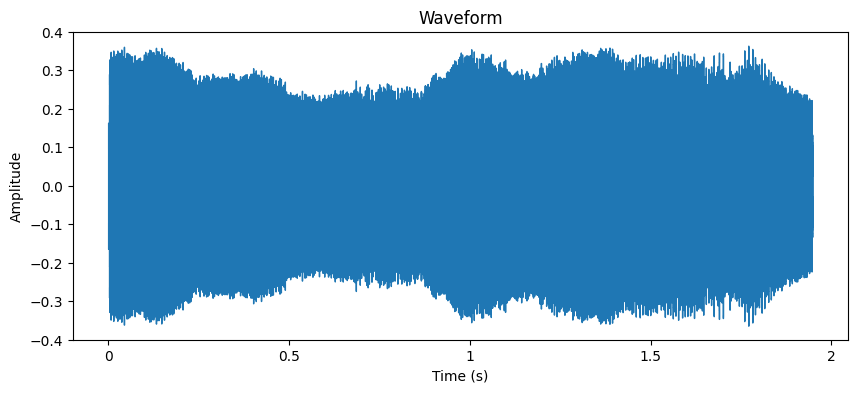

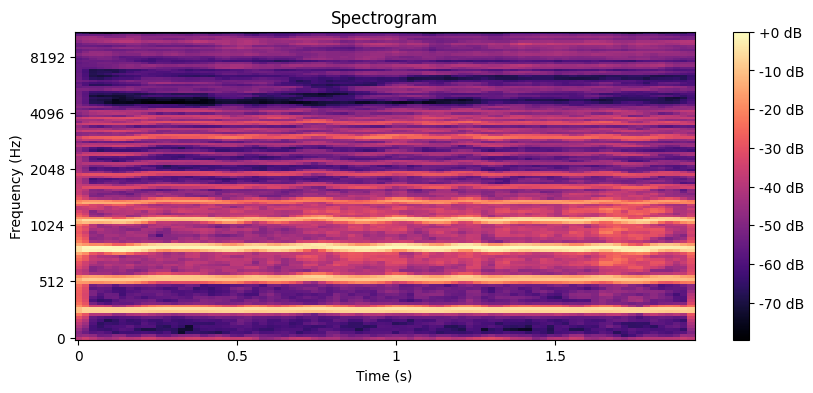

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Load the audio file
file_path = '/kaggle/input/sample1-data/1-a_n.wav'
waveform, sr = librosa.load(file_path)


# Calculate the duration of the waveform
duration = librosa.get_duration(y=waveform, sr=sr)
print(duration)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(waveform, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

# Calculate and plot the spectrogram
spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()


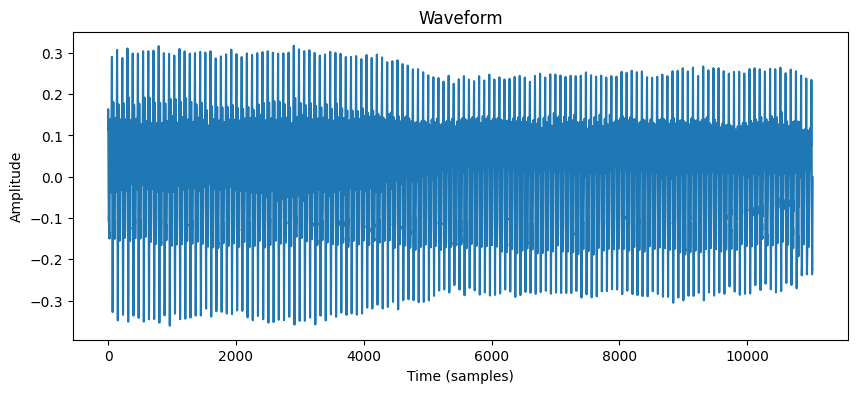

In [8]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
file_path = '/kaggle/input/sample1-data/1-a_n.wav'
waveform, sr = librosa.load(file_path)

# Define the start and end times (in seconds)
start_time = 0.0  # Adjust as needed
end_time = 0.5# Adjust as needed

# Convert start and end times to sample indices
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Plot the waveform for the selected time range
plt.figure(figsize=(10, 4))
plt.plot(waveform[start_sample:end_sample])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


**dysphonia women with normal pitch******


0.7548299319727891


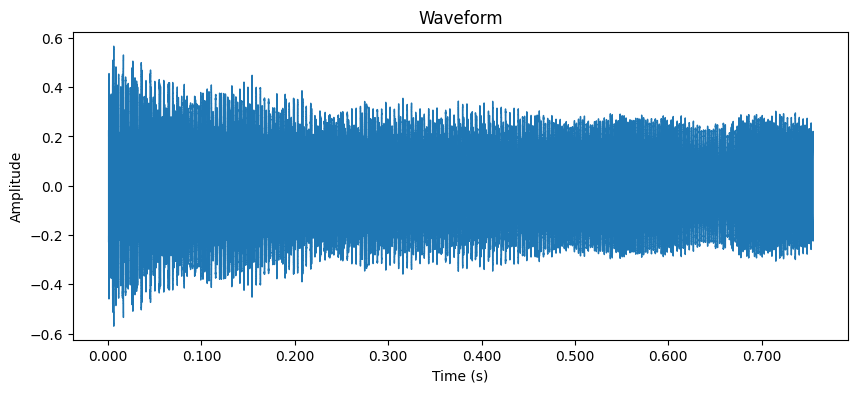

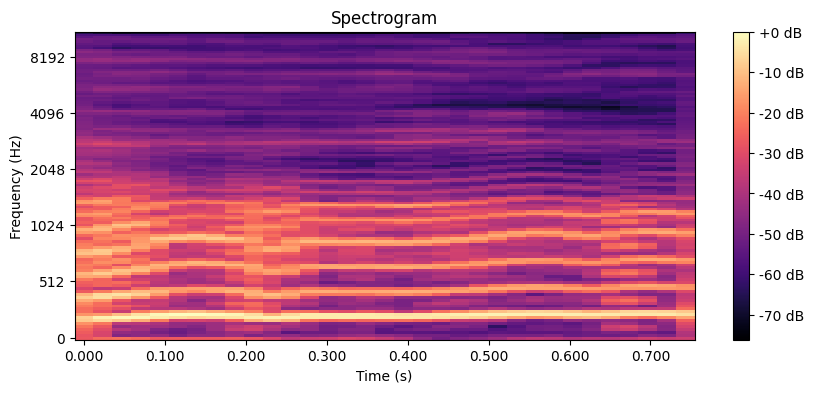

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
file_path = '/kaggle/input/sample6-data/1057-a_n.wav'
waveform, sr = librosa.load(file_path)

# Calculate the duration of the waveform
duration = librosa.get_duration(y=waveform, sr=sr)
print(duration)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(waveform, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

# Calculate and plot the spectrogram
spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()


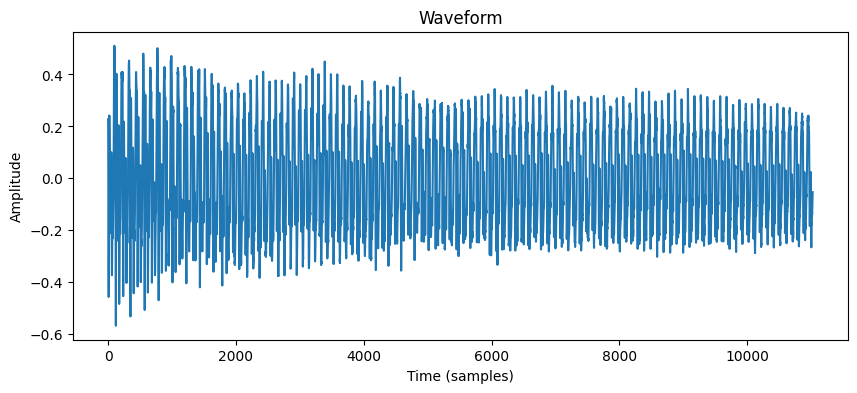

In [9]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
file_path = '/kaggle/input/sample6-data/1057-a_n.wav'
waveform, sr = librosa.load(file_path)

# Define the start and end times (in seconds)
start_time = 0.0  # Adjust as needed
end_time = 0.5# Adjust as needed

# Convert start and end times to sample indices
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

# Plot the waveform for the selected time range
plt.figure(figsize=(10, 4))
plt.plot(waveform[start_sample:end_sample])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


****normal man with normal
pitch

1.539954648526077


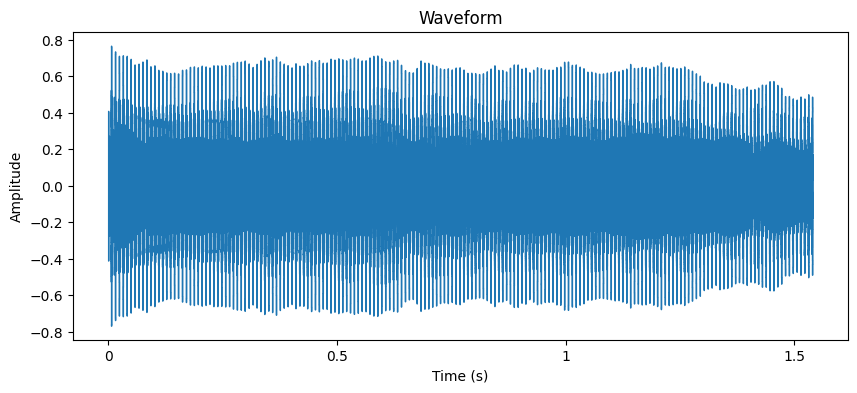

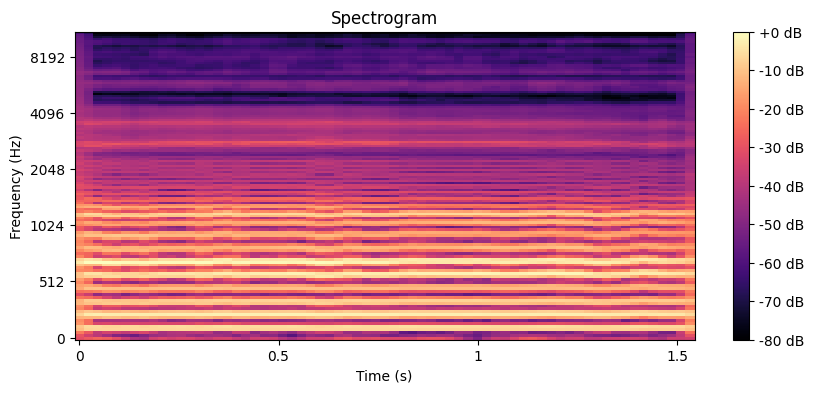

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
file_path = '/kaggle/input/sample-data/103-a_n.wav'
waveform, sr = librosa.load(file_path)

# Calculate the duration of the waveform
duration = librosa.get_duration(y=waveform, sr=sr)
print(duration)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(waveform, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

# Calculate and plot the spectrogram
spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()


****dysphonia man with normal
pitch****


1.0361451247165532


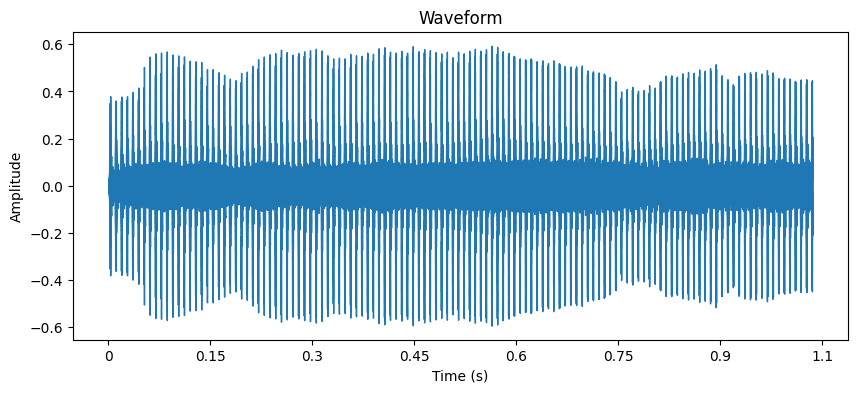

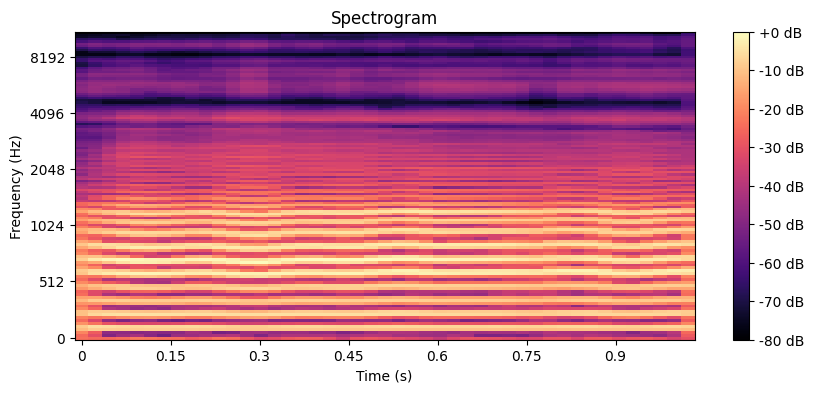

In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
file_path = '/kaggle/input/dataset7/1194-a_n.wav'
waveform, sr = librosa.load(file_path)

# Calculate the duration of the waveform
duration = librosa.get_duration(y=waveform, sr=sr)
print(duration)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(waveform, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

# Calculate and plot the spectrogram
spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()


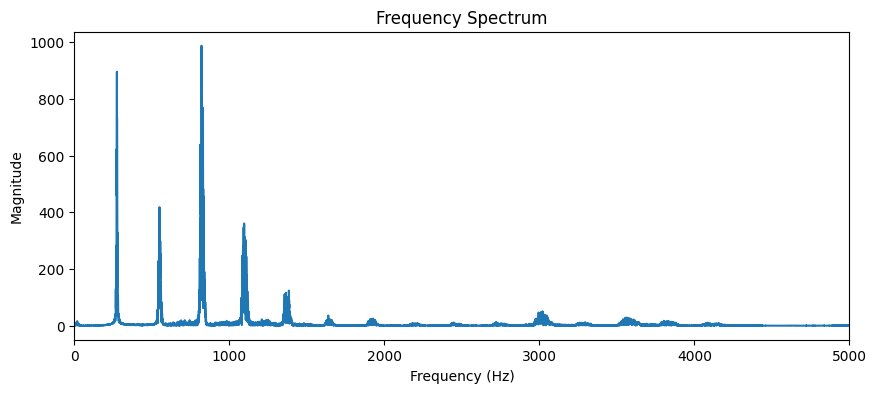

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
file_path = '/kaggle/input/sample1-data/1-a_n.wav'#normal man
waveform, sr = librosa.load(file_path)

# Calculate the duration of the waveform
duration = librosa.get_duration(y=waveform, sr=sr)

# Compute the Fourier Transform
fft = np.fft.fft(waveform)

# Calculate the frequencies corresponding to the FFT
frequencies = np.fft.fftfreq(len(fft), 1/sr)

# Plot the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(fft)//2], np.abs(fft)[:len(fft)//2])  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.xlim(0, 5000)  # Limit the x-axis to focus on frequencies up to 5000 Hz
plt.show()


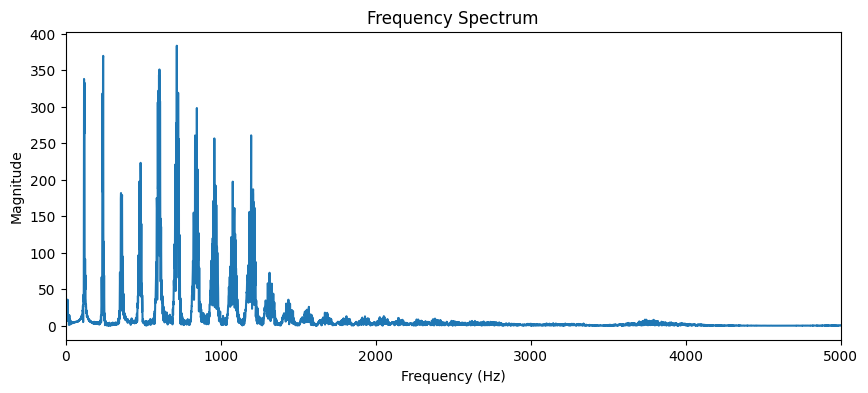

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
file_path = '/kaggle/input/dataset7/1194-a_n.wav'#dysphonia man
waveform, sr = librosa.load(file_path)

# Calculate the duration of the waveform
duration = librosa.get_duration(y=waveform, sr=sr)

# Compute the Fourier Transform
fft = np.fft.fft(waveform)

# Calculate the frequencies corresponding to the FFT
frequencies = np.fft.fftfreq(len(fft), 1/sr)

# Plot the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(fft)//2], np.abs(fft)[:len(fft)//2])  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.xlim(0, 5000)  # Limit the x-axis to focus on frequencies up to 5000 Hz
plt.show()


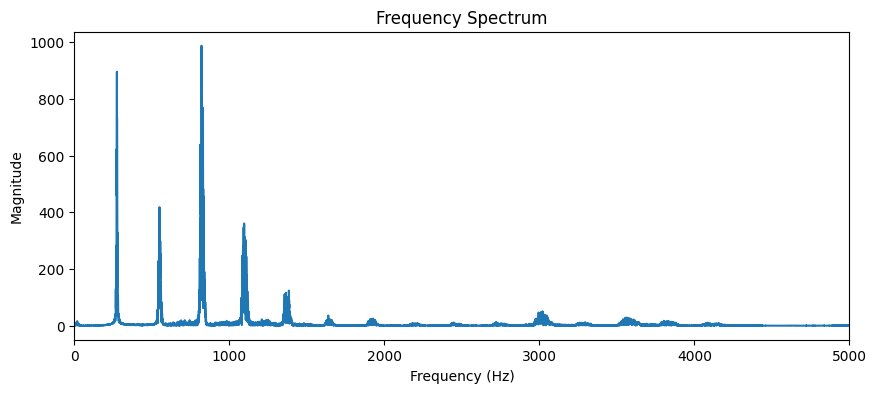

In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
file_path = '/kaggle/input/sample1-data/1-a_n.wav'#normal women
waveform, sr = librosa.load(file_path)

# Calculate the duration of the waveform
duration = librosa.get_duration(y=waveform, sr=sr)

# Compute the Fourier Transform
fft = np.fft.fft(waveform)

# Calculate the frequencies corresponding to the FFT
frequencies = np.fft.fftfreq(len(fft), 1/sr)

# Plot the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(fft)//2], np.abs(fft)[:len(fft)//2])  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.xlim(0, 5000)  # Limit the x-axis to focus on frequencies up to 5000 Hz
plt.show()


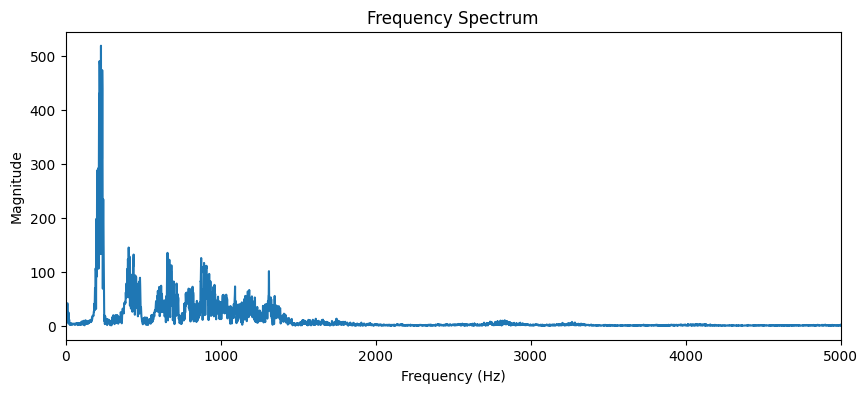

In [21]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
file_path = '/kaggle/input/sample6-data/1057-a_n.wav'#dysphonia women
waveform, sr = librosa.load(file_path)

# Calculate the duration of the waveform
duration = librosa.get_duration(y=waveform, sr=sr)

# Compute the Fourier Transform
fft = np.fft.fft(waveform)

# Calculate the frequencies corresponding to the FFT
frequencies = np.fft.fftfreq(len(fft), 1/sr)

# Plot the frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(fft)//2], np.abs(fft)[:len(fft)//2])  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.xlim(0, 5000)  # Limit the x-axis to focus on frequencies up to 5000 Hz
plt.show()


<Figure size 800x600 with 0 Axes>

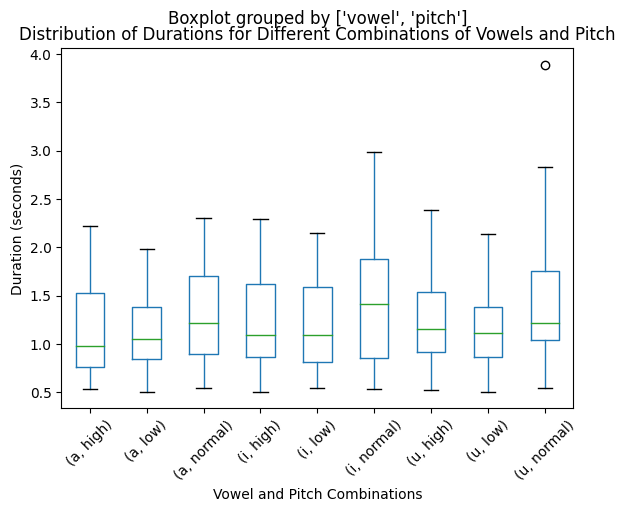

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('/kaggle/input/dataset-1-csv/dataset (1).csv')
# Filter the DataFrame to include only rows where the case is "normal"
normal_df = df[df['case'] == 'normal']
# Create a box plot
plt.figure(figsize=(8, 6))
boxplot_normal = normal_df.boxplot(column='Duration', by=['vowel', 'pitch'], grid=False)
plt.title('Distribution of Durations for Different Combinations of Vowels and Pitch')
plt.xlabel('Vowel and Pitch Combinations')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.show()


<Figure size 800x600 with 0 Axes>

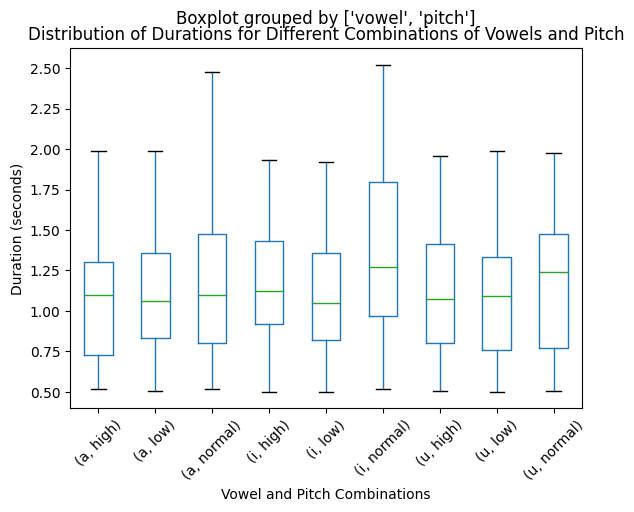

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('/kaggle/input/dataset-1-csv/dataset (1).csv')
# Filter the DataFrame to include only rows where the case is "normal"
normal_df = df[df['case'] == 'dysphonia']
# Create a box plot
plt.figure(figsize=(8, 6))
boxplot_normal = normal_df.boxplot(column='Duration', by=['vowel', 'pitch'], grid=False)
plt.title('Distribution of Durations for Different Combinations of Vowels and Pitch')
plt.xlabel('Vowel and Pitch Combinations')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.show()


In [28]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('/kaggle/input/dataset-1-csv/dataset (1).csv')

# Separate data for dysphonia and normal cases
dysphonia_df = df[df['case'] == 'dysphonia']
normal_df = df[df['case'] == 'normal']

# Calculate descriptive statistics for the "Duration" column for dysphonia and normal cases
dysphonia_stats = dysphonia_df['Duration'].describe()
normal_stats = normal_df['Duration'].describe()

# Print the statistics
print("Descriptive Statistics for Duration (Dysphonia):")
print(dysphonia_stats)
print("\nDescriptive Statistics for Duration (Normal):")
print(normal_stats)


Descriptive Statistics for Duration (Dysphonia):
count    531.000000
mean       1.154526
std        0.409907
min        0.500160
25%        0.823350
50%        1.121700
75%        1.427440
max        2.521020
Name: Duration, dtype: float64

Descriptive Statistics for Duration (Normal):
count    603.000000
mean       1.240821
std        0.488944
min        0.503820
25%        0.863290
50%        1.132700
75%        1.595020
max        3.890020
Name: Duration, dtype: float64


In [31]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('/kaggle/input/dataset-1-csv/dataset (1).csv')

# Define the tolerance range for duration (e.g., +/- 0.1 seconds)
tolerance = 0.1
target_duration = 3

# Filter rows where the duration is within the tolerance range of the target duration
target_df = df[(df['Duration'] >= target_duration - tolerance) & (df['Duration'] <= target_duration + tolerance)]

# Print the extracted rows
print("Rows with duration approximately", target_duration, "seconds:")
print(target_df)


Rows with duration approximately 3 seconds:
    Unnamed: 0       File Name  Duration  Sampling Rate  \
23          23  9-i_normal.wav   2.98482          50000   

                                           Audio Data   pitch    case gender  \
23  [0.09747314 0.08126831 0.06604004 ... 0.087188...  normal  normal    man   

    Numerical Prefix vowel  
23                 9     i  


In [4]:
import os
import numpy as np
import librosa
import json

# Function to extract features from audio file
def extract_features(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Extract features
        features = []
        
        # Example features: MFCCs (13 coefficients), zero crossing rate, spectral centroid
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        
        # Append features to the list
        features.append(float(np.mean(mfccs)))
        features.append(float(np.mean(zero_crossing_rate)))
        features.append(float(np.mean(spectral_centroid)))
        
        return features
    
    except Exception as e:
        print("Error encountered while processing file:", file_path)
        print(e)  # Print the exception for debugging
        return None

# Path to the folder containing audio files
folder_path = "/kaggle/input/sample-data"

# List to store extracted features from all files
all_features = []

# Loop through each audio file in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Extract features from the audio file
    features = extract_features(file_path)
    
    # If features were successfully extracted, append them to the list
    if features:
        all_features.append(features)

# Save all features to a JSON file
output_file_path = "extracted_features.json"
with open(output_file_path, 'w') as f:
    json.dump(all_features, f)

print("Features saved to:", output_file_path)


Features saved to: extracted_features.json


In [6]:
import os
import numpy as np
import librosa
import json

# Function to extract features from audio file
def extract_features(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Extract features
        features = []
        
        # Example features: MFCCs (13 coefficients), zero crossing rate, spectral centroid
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        
        # Append features to the list
        features.append(float(np.mean(mfccs)))
        features.append(float(np.mean(zero_crossing_rate)))
        features.append(float(np.mean(spectral_centroid)))
        
        return features
    
    except Exception as e:
        print("Error encountered while processing file:", file_path)
        print(e)  # Print the exception for debugging
        return None

# Path to the folder containing audio files
folder_path = "/kaggle/input/sample-data"

# Total number of features
total_features = 0

# Loop through each audio file in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Extract features from the audio file
    features = extract_features(file_path)
    
    # If features were successfully extracted, add the number of features to the total
    if features:
        total_features += len(features)

# Print the total number of features
print("Total number of features extracted:", total_features)


Total number of features extracted: 960


In [23]:
import os
import numpy as np
import pandas as pd
import librosa

# Function to extract features from audio file
def extract_features(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Extract features
        features = {}
        
        # Example features: MFCCs (13 coefficients), zero crossing rate, spectral centroid
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        
        # Add features to dictionary
        features['MFCC_mean'] = np.mean(mfccs)
        features['Zero_Crossing_Rate_mean'] = np.mean(zero_crossing_rate)
        features['Spectral_Centroid_mean'] = np.mean(spectral_centroid)
        
        return features
    
    except Exception as e:
        print("Error encountered while processing file:", file_path)
        print(e)  # Print the exception for debugging
        return None

# Path to the folder containing audio files for normal cases
folder_path_normal = "/kaggle/input/sample-data"

# List to store extracted features from all files
all_features = []

# Loop through each audio file in the folder for normal cases
for file_name in os.listdir(folder_path_normal):
    file_path = os.path.join(folder_path_normal, file_name)
    
    # Extract features from the audio file
    features = extract_features(file_path)
    
    # If features were successfully extracted, append them to the list
    if features:
        features['Case'] = 'normal'
        all_features.append(features)

# Create DataFrame from the list of features
df = pd.DataFrame(all_features)

# Save DataFrame to a CSV file
output_file_path = "extracted_features1.csv"
df.to_csv(output_file_path, index=False)

print("Features saved to:", output_file_path)


Features saved to: extracted_features1.csv


In [26]:
import os
import numpy as np
import pandas as pd
import librosa

# Function to extract features from audio file
def extract_features(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Extract features
        features = {}
        
        # Example features: MFCCs (13 coefficients), zero crossing rate, spectral centroid
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        
        # Add features to dictionary
        features['MFCC_mean'] = np.mean(mfccs)
        features['Zero_Crossing_Rate_mean'] = np.mean(zero_crossing_rate)
        features['Spectral_Centroid_mean'] = np.mean(spectral_centroid)
        
        return features
    
    except Exception as e:
        print("Error encountered while processing file:", file_path)
        print(e)  # Print the exception for debugging
        return None

# Path to the folder containing audio files for normal cases
folder_path_normal = "/kaggle/input/dataset7"

# List to store extracted features from all files
all_features = []

# Loop through each audio file in the folder for normal cases
for file_name in os.listdir(folder_path_normal):
    file_path = os.path.join(folder_path_normal, file_name)
    
    # Extract features from the audio file
    features = extract_features(file_path)
    
    # If features were successfully extracted, append them to the list
    if features:
        features['Case'] = 'dysphonia'
        all_features.append(features)

# Create DataFrame from the list of features
df = pd.DataFrame(all_features)

# Save DataFrame to a CSV file
output_file_path = "extracted_features2.csv"
df.to_csv(output_file_path, index=False)

print("Features saved to:", output_file_path)


Features saved to: extracted_features2.csv


In [27]:
import pandas as pd

# Paths to the CSV files containing the extracted features from each folder
file_path_folder1 = "extracted_features1.csv"
file_path_folder2 = "extracted_features2.csv"

# Read the CSV files into separate DataFrames
df_folder1 = pd.read_csv(file_path_folder1)
df_folder2 = pd.read_csv(file_path_folder2)

# Concatenate the DataFrames along the rows
df_combined = pd.concat([df_folder1, df_folder2], ignore_index=True)

# Save the combined DataFrame to a new CSV file if needed
output_combined_file_path = "combined_features.csv"
df_combined.to_csv(output_combined_file_path, index=False)

print("Combined features saved to:", output_combined_file_path)


Combined features saved to: combined_features.csv


In [44]:
# Load the combined features DataFrame
df_combined = pd.read_csv("combined_features.csv")

# Print the DataFrame before the mapping
print("DataFrame before mapping:")
print(df_combined)

# Define mapping from categories to numerical values
category_mapping = {'normal': 0, 'dysphonia': 1}

# Map categories to numerical values in the original DataFrame
df_combined['Case'] = df_combined['Case'].map(category_mapping)

# Print the DataFrame after the mapping
print("\nDataFrame after mapping:")
print(df_combined)



DataFrame before mapping:
     MFCC_mean  Zero_Crossing_Rate_mean  Spectral_Centroid_mean       Case
0    -8.445811                 0.024636             1286.804158     normal
1    -5.218376                 0.012013              690.975258     normal
2     1.235641                 0.029494             2036.953362     normal
3   -16.135286                 0.012842              688.488380     normal
4    -2.735105                 0.018483             1242.817084     normal
..         ...                      ...                     ...        ...
625 -10.159746                 0.031938             1913.138720  dysphonia
626  -9.882232                 0.070778             4360.223047  dysphonia
627 -12.420034                 0.020486             1334.365205  dysphonia
628 -10.068985                 0.002474             1037.048110  dysphonia
629  -5.763110                 0.005790             1174.649070  dysphonia

[630 rows x 4 columns]

DataFrame after mapping:
     MFCC_mean  Zero_Cro

In [ ]:
import pandas as pd

# Load the combined features DataFrame
df_combined = pd.read_csv("combined_features.csv")

# Print the DataFrame before the mapping
print("DataFrame before mapping:")
print(df_combined)

# Define mapping from categories to numerical values
category_mapping = {'normal': 0, 'dysphonia': 1}

# Map categories to numerical values in the original DataFrame
df_combined['Case'] = df_combined['Case'].map(category_mapping)

# Print the DataFrame after the mapping
print("\nDataFrame after mapping:")
print(df_combined)

# Save the mapped DataFrame to a new CSV file
df_combined.to_csv("mapped_combined_features.csv", index=False)

print("Dataset after mapping saved successfully as mapped_combined_features.csv")


In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the combined features DataFrame
df_combined = pd.read_csv("/kaggle/input/df-combined/df_combined1.csv")

# Separate features (X) and labels (y)
X = df_combined[['MFCC_mean', 'Zero_Crossing_Rate_mean', 'Spectral_Centroid_mean']]
y = df_combined['Case']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.626984126984127
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69        73
           1       0.57      0.49      0.53        53

    accuracy                           0.63       126
   macro avg       0.61      0.61      0.61       126
weighted avg       0.62      0.63      0.62       126



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the combined features DataFrame
df_combined = pd.read_csv("/kaggle/working/df_combined1.csv")

# Separate features (X) and labels (y)
X = df_combined[['MFCC_mean', 'Zero_Crossing_Rate_mean', 'Spectral_Centroid_mean']]

y = df_combined['Case']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


In [4]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Sample X_train:")
print(X_train)
print("Sample X_test:")
print(X_test)


X_train shape: (504, 1)
X_test shape: (126, 1)
Sample X_train:
     Case
335     1
6       0
104     0
114     0
533     1
..    ...
71      0
106     0
270     0
435     1
102     0

[504 rows x 1 columns]
Sample X_test:
     Case
497     1
244     0
552     1
213     0
549     1
..    ...
388     1
322     1
218     0
462     1
511     1

[126 rows x 1 columns]
